# Simple Linear Regression

## Loading data

In [1]:
dataset = read.csv('./Datasets/Salary_Data.csv')

In [2]:
dataset

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


## Splitting data into training and test

In [3]:
# install.packages('caTools')
library(caTools)
set.seed(123)

# Feature Scaling - Supposedly not necessary here.
# dataset = scale(dataset)

# Splitting the dataset into the Training set and Test set
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# You could scale after splitting too (?).
# training_set = scale(training_set)
# test_set = scale(test_set)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [4]:
test_set

,YearsExperience,Salary
2,1.3,46205
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812
26,9.0,105582


## Fitting Simple Linear Regression to the Training set

In [5]:
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)

In [6]:
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


## Predicting the Test set results

In [7]:
y_pred = predict(regressor, newdata = test_set)

In [8]:
test_set["Prediction"] = y_pred
test_set

,YearsExperience,Salary,Prediction
2,1.3,46205,37766.77
4,2.0,43525,44322.33
5,2.2,39891,46195.35
8,3.2,54445,55560.43
11,3.9,63218,62115.99
16,4.9,67938,71481.07
20,6.0,93940,81782.66
21,6.8,91738,89274.72
24,8.2,113812,102385.84
26,9.0,105582,109877.90


# Visualizing the Training set results

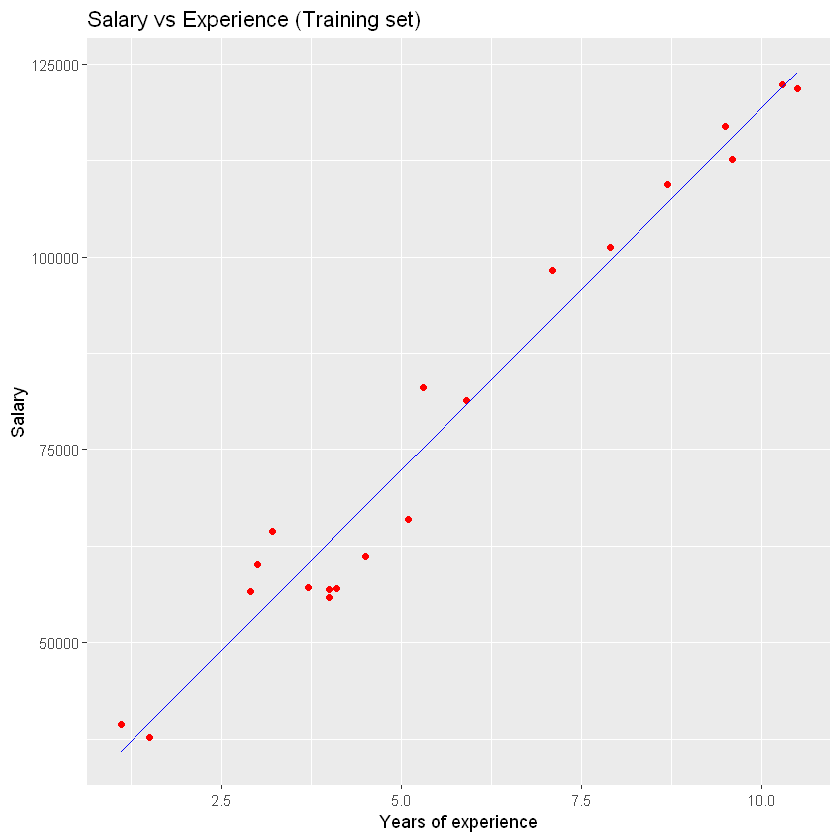

In [9]:
suppressPackageStartupMessages(library(ggplot2))
ggplot() +
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Training set)') +
  xlab('Years of experience') +
  ylab('Salary')

# Visualizing the Test set results

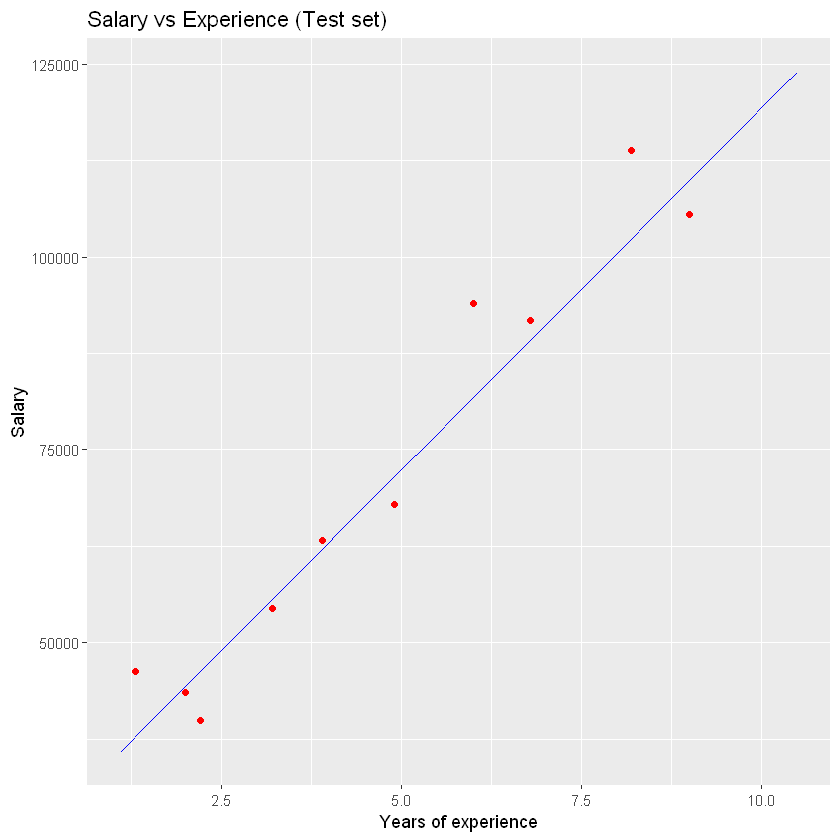

In [10]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')